# Decision Trees from Scratch - Oded Ben Chetrit 



In this project I will implement a simple version of Decision Tree regressor from scratch.

### Decision Tree Class: 

In [ ]:
import numpy as np

# Define Node class:
class Node:
    def __init__(self, leaf_value=None, left=None, right=None, feature=None, threshold=None):
        self._leaf_value = leaf_value
        self._left = left
        self._right = right
        self._feature = feature
        self._threshold = threshold


# Define Tree class:
class DecisionTree:
    def __init__(self, X, Y, min_leaf=None, max_depth=None):
        self.X = X
        self.Y = Y
        self.min_leaf = min_leaf
        self.max_depth = max_depth
        self.root = None

    def Create_Tree(self, X, Y, depth=0):
        n_samples = X.shape[0]
        n_features = X.shape[1]

        # define stopping criterion for recursion:
        if n_samples > self.min_leaf and depth < self.max_depth:
            
            # split the data according to rule: 
            X_right, Y_right, X_left, Y_left, best_feature, threshold = self.Split(X, Y, n_samples, n_features)
            
            # continue recursively to left and right sides of the tree:  
            left_Tree = self.Create_Tree(X_left, Y_left, depth + 1)
            right_Tree = self.Create_Tree(X_right, Y_right, depth + 1)
            
            # return Node
            return Node(left=left_Tree, right=right_Tree, feature=best_feature, threshold=threshold)
        #return leaf value which is the mean value of Y's: 
        return Node(leaf_value=np.mean(Y))

    # I chose the method of Train error minimization (mean squared error) 
    def Split(self, X, Y, n_samples, n_features):
        
        # initialize SSR score (Sum of Squares Residuals): 
        SSR = np.inf
        
        # run over features in data: 
        for feature in range(n_features):
            
            # iterate over unique values of samples in each feature: 
            steps = np.unique(X[:, feature])
            for i, step in enumerate(steps[:-1]):
                
                # Group by each sides of the threshod
                Y_left = np.array([Y[j] for j, row in enumerate(X) if row[feature] <= step])
                Y_right = np.array([Y[j] for j, row in enumerate(X) if row[feature] > step])
                
                # Compure SSR for both parts:
                Y_right_mean = np.mean(Y_right)
                ssr1 = np.sum((Y_right - Y_right_mean) ** 2)

                Y_left_mean = np.mean(Y_left)
                ssr2 = np.sum((Y_left - Y_left_mean) ** 2)

                tot_ssr = (ssr1 + ssr2) / n_samples
                
                # Keep the values of the optimal SSR: 
                if tot_ssr < SSR:
                    SSR = tot_ssr
                    threshold = (steps[i + 1] + steps[i]) / 2
                    best_feature = feature
                    Y_right_out = Y_right
                    Y_left_out = Y_left
        
        # Split data according to the chosen best feature and threshold: 
        X_left_out = np.array([row for row in X if row[best_feature] <= threshold])
        X_right_out = np.array([row for row in X if row[best_feature] > threshold])
        
        return X_right_out, Y_right_out, X_left_out, Y_left_out, best_feature, threshold

    def fit(self):
        self.root = self.Create_Tree(self.X, self.Y)

    def predict_sample(self, x, Tree):
        if Tree._leaf_value:
            return Tree._leaf_value

        else:
            feature = x[Tree._feature]
            if feature <= Tree._threshold:
                return self.predict_sample(x, Tree._left)
            else:
                return self.predict_sample(x, Tree._right)

    def predict(self, X):
        self.y_preds = np.array([self.predict_sample(x, self.root) for x in X])
        return self.y_preds
    
    
    def mse(self, Y_test):
        return np.mean((self.y_preds - Y_test)**2)

### Import Boston dataset: 

In [2]:
# import data set and arrange train and test sets:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

data = load_boston()
X = data['data']
Y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Hyperparameter tuning: 

In [3]:
# Choosing the best hyperparameter, Run the algorithm with different combinations of min_leaves and max_depths: 

leaves = [1,5,10,100]
depths = [5,8,10,12,100]

best_mse = np.inf
i = 1

for m_leaf in leaves:
    for mx_d in depths:
        DT = DecisionTree(X_train, y_train, min_leaf = m_leaf, max_depth=mx_d)
        DT.fit()
        DT.predict(X_train)
        mse_train = DT.mse(y_train)
        
        DT.predict(X_test)
        mse = DT.mse(y_test)
        if mse < best_mse:
            best_mse = mse
            best_params = {'min_leaf' : m_leaf, 'depth' : mx_d}
        print(f'iteration: {i}, min leaf: {m_leaf}, max depth: {mx_d}, ,mse_train = {round(mse_train,3)}, mse_test: {round(mse,3)}')
        i += 1

iteration: 1, min leaf: 1, max depth: 5, ,mse_train = 7.079, mse_test: 8.423
iteration: 2, min leaf: 1, max depth: 8, ,mse_train = 1.949, mse_test: 9.283
iteration: 3, min leaf: 1, max depth: 10, ,mse_train = 0.552, mse_test: 10.989
iteration: 4, min leaf: 1, max depth: 12, ,mse_train = 0.14, mse_test: 11.41
iteration: 5, min leaf: 1, max depth: 100, ,mse_train = 0.0, mse_test: 11.512
iteration: 6, min leaf: 5, max depth: 5, ,mse_train = 8.147, mse_test: 8.654
iteration: 7, min leaf: 5, max depth: 8, ,mse_train = 3.438, mse_test: 9.471
iteration: 8, min leaf: 5, max depth: 10, ,mse_train = 2.372, mse_test: 10.987
iteration: 9, min leaf: 5, max depth: 12, ,mse_train = 2.053, mse_test: 11.077
iteration: 10, min leaf: 5, max depth: 100, ,mse_train = 1.96, mse_test: 11.077
iteration: 11, min leaf: 10, max depth: 5, ,mse_train = 8.19, mse_test: 8.663
iteration: 12, min leaf: 10, max depth: 8, ,mse_train = 4.088, mse_test: 8.571
iteration: 13, min leaf: 10, max depth: 10, ,mse_train = 3.302,

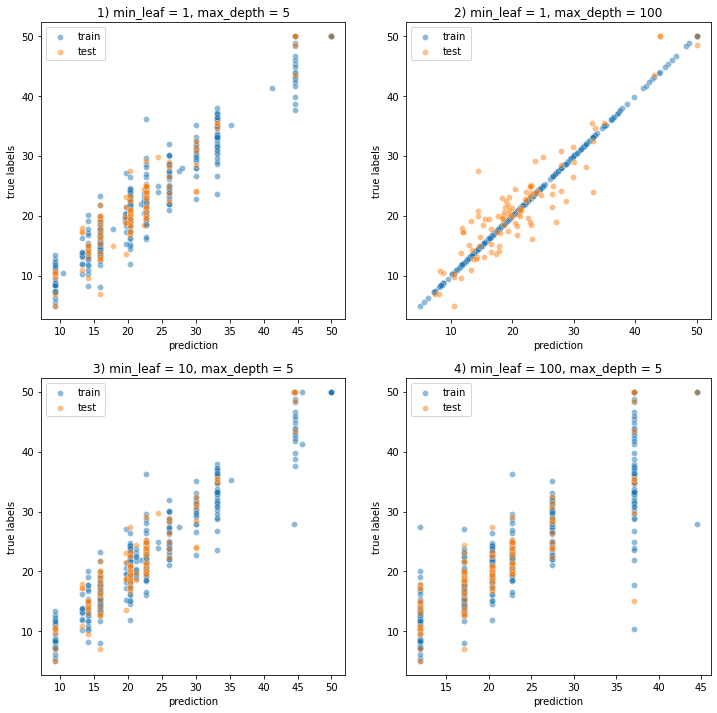

In [4]:
# Create a helper function for plotting the best combination and other edge cases:
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette("deep")
def plot_comparison(min_leaf, max_depth, i):
    
    DT = DecisionTree(X_train, y_train, min_leaf = min_leaf, max_depth=max_depth)
    DT.fit()
    y_preds = DT.predict(X_train)
    sns.scatterplot(x = y_preds, y = y_train, alpha = 0.5, label = 'train')
    y_preds = DT.predict(X_test)
    sns.scatterplot(x = y_preds, y = y_test, alpha = 0.5, label = 'test')
    plt.xlabel('prediction')
    plt.ylabel('true labels')
    plt.title(f'{i+1}) min_leaf = {min_leaf}, max_depth = {max_depth}')
    plt.legend()
    
cases = [(best_params['min_leaf'],best_params['depth']), (1,100), (10,5), (100,5)]
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(2,2,i+1)
    plot_comparison(cases[i][0],cases[i][1],i)

Discusion: The regression tree I built and trained was tested with some hyperparameters. We can see that different hyper parameters change the behaviour of the models. 

In plot no.1 we see that the best combination of min_leaf and max_depth that yeiled the smallest mse score for the test set was min_leaf = 1 and max_depth = 5 with test mse = 8.423. 

In plot no.2 there is an example of the most overfitted model, with min_leaf = 1 and max depth = 100, the tree is overfitting the training data completly, with train mse of 0, but the test mse is 11.51. 

In plot no.3 we have the run with the smallest variance - the test and train mse are the closest (8.66 and 8.19 respectiviely)

In plot no.4 we have an example of a biased model, where both the train and test have large errors, this is due to over generalized model, and this happens because of the large value of min_leaf (100).  